# Tâches d'analyses


Tâches d'analyse :
Ventes par produit :

Calculer les ventes totales pour chaque produit (en termes de montant total et quantité).
Identifier le produit le plus vendu et celui qui a généré le plus de revenus.
Performance par région :

Analyser les ventes totales par région.
Identifier la région avec les meilleures performances en termes de chiffre d'affaires.
Analyse temporelle :

Identifier les mois avec les ventes les plus élevées.
Analyser la tendance des ventes sur l'année : les mois de pointe et les mois faibles.
Comportement des clients :

Analyser le nombre de ventes par client.
Identifier les clients les plus fidèles (ceux ayant réalisé le plus d'achats).
Calculer le montant moyen dépensé par client.
Méthode de paiement :

Analyser la répartition des ventes par méthode de paiement.
Identifier si certaines méthodes de paiement sont plus populaires que d'autres.
Prix moyen des produits :

Calculer le prix moyen des produits vendus, et identifier s'il y a des produits dont les prix sont plus élevés en moyenne.
Détection d'anomalies :

Identifier les transactions qui semblent anormalement élevées ou faibles par rapport à la norme.
Prévision des ventes :

Créer une prévision des ventes pour les prochains mois sur la base des données existantes.

# Analyse

In [2]:
import pandas as pd

data = pd.read_csv("Veret_sales_data.csv")

In [3]:
data.head()

,ID Vente,Date Vente,Client ID,Produit,Quantité,Prix Unitaire,Montant Total,Méthode de Paiement,Region
0,1,2024-08-11,C00959,Tablette,4,144,576,Virement,Royaume-Uni
1,2,2024-11-10,C00315,Enceinte Bluetooth,5,266,1330,Virement,Allemagne
2,3,2024-06-16,C00081,Casque Audio,4,99,396,Carte,Inde
3,4,2024-02-26,C00998,Disque Dur Externe,4,220,880,Espèce,Brésil
4,5,2024-08-08,C00858,Tablette,1,177,177,Chèque,Allemagne


## Nettoyage du dataframe

In [4]:
data.shape

(100000, 9)

In [5]:
data.dtypes

ID Vente                int64
Date Vente             object
Client ID              object
Produit                object
Quantité                int64
Prix Unitaire           int64
Montant Total           int64
Méthode de Paiement    object
Region                 object
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID Vente             100000 non-null  int64 
 1   Date Vente           100000 non-null  object
 2   Client ID            100000 non-null  object
 3   Produit              100000 non-null  object
 4   Quantité             100000 non-null  int64 
 5   Prix Unitaire        100000 non-null  int64 
 6   Montant Total        100000 non-null  int64 
 7   Méthode de Paiement  100000 non-null  object
 8   Region               100000 non-null  object
dtypes: int64(4), object(5)
memory usage: 6.9+ MB


In [8]:
data[data.duplicated()]

,ID Vente,Date Vente,Client ID,Produit,Quantité,Prix Unitaire,Montant Total,Méthode de Paiement,Region


## Vente par produit

### Q.1. Calculer les ventes totales pour chaque produit (en termes de montant total et quantité)

In [13]:
max_sales = data.groupby('Produit').agg({'Quantité': 'sum', 'Montant Total': 'sum'})
max_sales

,Quantité,Montant Total
Produit,,
Casque Audio,54771,13918643
Chargeur Sans Fil,55615,14253916
Clé USB,55741,14202023
Disque Dur Externe,54388,13748813
Enceinte Bluetooth,54734,14083176
Montre Connectée,55264,14009256
Ordinateur Portable,55811,14168804
Smartphone,54803,13771503
Tablette,54733,13985502


### Q.3 Produit le plus vendu en termes de quantité

In [21]:
max_sales[max_sales['Quantité'] == max_sales['Quantité'].max()]

,Quantité,Montant Total
Produit,,
Ordinateur Portable,55811,14168804


### Q.4 Produit qui a généré le plus de revenu

In [23]:
max_sales[max_sales['Montant Total'] == max_sales['Montant Total'].max()]

,Quantité,Montant Total
Produit,,
Chargeur Sans Fil,55615,14253916


## Vente par région

### Q1. Analyser les ventes totales par région

In [27]:
region_ventes = data.groupby('Region').agg({'Montant Total': 'sum'})
region_ventes.sort_values(by="Montant Total", ascending=False)

,Montant Total
Region,
Canada,14300483
Italie,14193896
Brésil,14181462
États-Unis,14176350
Inde,14128942
Allemagne,14050472
Royaume-Uni,13950024
France,13925467
Australie,13888832


## Analyse temporelle

### Q.1.Identifier les mois avec les ventes les plus élevées

In [28]:
data.head()

,ID Vente,Date Vente,Client ID,Produit,Quantité,Prix Unitaire,Montant Total,Méthode de Paiement,Region
0,1,2024-08-11,C00959,Tablette,4,144,576,Virement,Royaume-Uni
1,2,2024-11-10,C00315,Enceinte Bluetooth,5,266,1330,Virement,Allemagne
2,3,2024-06-16,C00081,Casque Audio,4,99,396,Carte,Inde
3,4,2024-02-26,C00998,Disque Dur Externe,4,220,880,Espèce,Brésil
4,5,2024-08-08,C00858,Tablette,1,177,177,Chèque,Allemagne


#### Créer une colonne avec les mois uniquement

In [29]:
data.dtypes

ID Vente                int64
Date Vente             object
Client ID              object
Produit                object
Quantité                int64
Prix Unitaire           int64
Montant Total           int64
Méthode de Paiement    object
Region                 object
dtype: object

In [30]:
data['Month'] = pd.to_datetime(data['Date Vente'])

In [31]:
data.head()

,ID Vente,Date Vente,Client ID,Produit,Quantité,Prix Unitaire,Montant Total,Méthode de Paiement,Region,Month
0,1,2024-08-11,C00959,Tablette,4,144,576,Virement,Royaume-Uni,2024-08-11
1,2,2024-11-10,C00315,Enceinte Bluetooth,5,266,1330,Virement,Allemagne,2024-11-10
2,3,2024-06-16,C00081,Casque Audio,4,99,396,Carte,Inde,2024-06-16
3,4,2024-02-26,C00998,Disque Dur Externe,4,220,880,Espèce,Brésil,2024-02-26
4,5,2024-08-08,C00858,Tablette,1,177,177,Chèque,Allemagne,2024-08-08


In [32]:
data.dtypes

ID Vente                        int64
Date Vente                     object
Client ID                      object
Produit                        object
Quantité                        int64
Prix Unitaire                   int64
Montant Total                   int64
Méthode de Paiement            object
Region                         object
Month                  datetime64[ns]
dtype: object

In [33]:
data['Month_N'] = data['Month'].dt.month

In [34]:
data.head()

,ID Vente,Date Vente,Client ID,Produit,Quantité,Prix Unitaire,Montant Total,Méthode de Paiement,Region,Month,Month_N
0,1,2024-08-11,C00959,Tablette,4,144,576,Virement,Royaume-Uni,2024-08-11,8
1,2,2024-11-10,C00315,Enceinte Bluetooth,5,266,1330,Virement,Allemagne,2024-11-10,11
2,3,2024-06-16,C00081,Casque Audio,4,99,396,Carte,Inde,2024-06-16,6
3,4,2024-02-26,C00998,Disque Dur Externe,4,220,880,Espèce,Brésil,2024-02-26,2
4,5,2024-08-08,C00858,Tablette,1,177,177,Chèque,Allemagne,2024-08-08,8


In [49]:
month_sales = data.groupby('Month_N').agg({'Montant Total': 'sum'})
month_sales.sort_values(by='Montant Total', ascending=False)

In [42]:
import seaborn as sns

<AxesSubplot: xlabel='Month_N'>

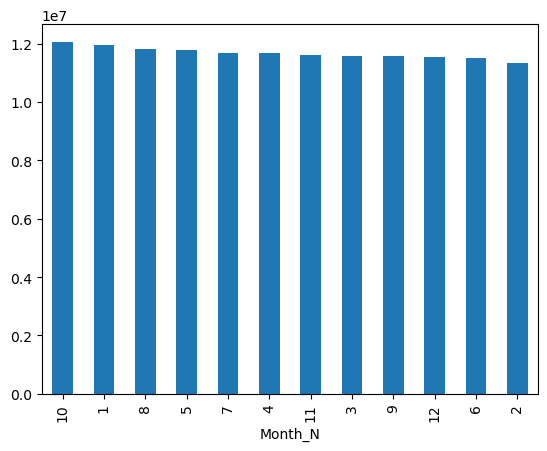

In [50]:
month_sales['Montant Total'].plot(kind='bar', title='Montant Total par Mois')